In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
file_path = '/Users/soumyaaloor/Downloads/DataScience_Salaries.csv' 
data = pd.read_csv(file_path)

# Preview dataset
print(data.head())
print(data.info())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


<Axes: xlabel='salary'>

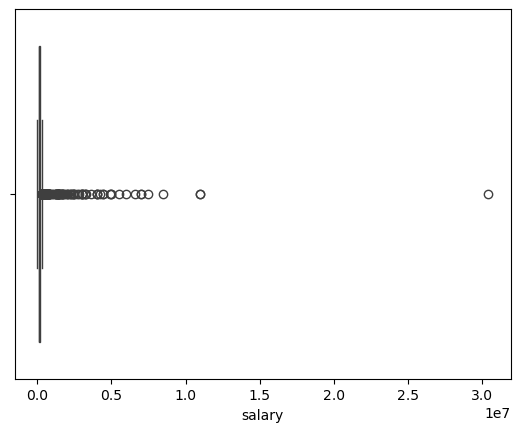

In [6]:
#Cleaning the dataset

# Checking for missing values
print(data.isnull().sum())

# Dropping rows with missing values
data.dropna(inplace=True)

#Standardizing the Column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Checking for Outliers
sns.boxplot(data=data, x='salary')  # Replace with actual salary column


In [10]:
#Removing the outliers 
upper_limit = data['salary'].quantile(0.99)
data = data[data['salary'] <= upper_limit]

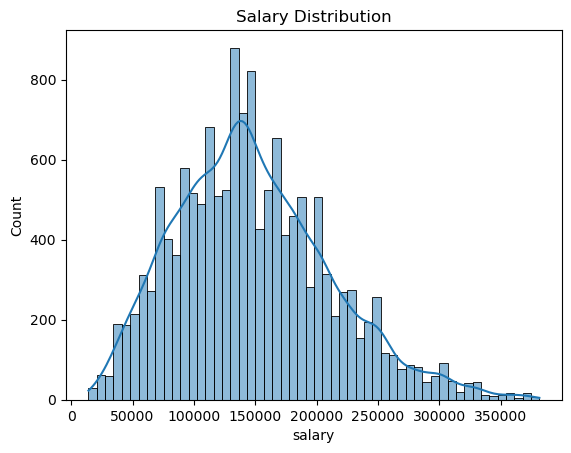

In [20]:
# Visualizing Salary distribution
sns.histplot(data['salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

/var/folders/bj/3dq6n2f10hq2jp3n279bbntw0000gn/T/ipykernel_17228/3549971007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_role = data.groupby('job_title')['salary'].mean().sort_values(ascending=False)


job_title
Data Science Tech Lead            375000.000000
Analytics Engineering Manager     325000.000000
Head of Machine Learning          284000.000000
Managing Director Data Science    280000.000000
AWS Data Architect                258000.000000
                                      ...      
Admin & Data Analyst               49333.333333
Data Quality Manager               48000.000000
Compliance Data Analyst            45000.000000
Insight Analyst                    40083.333333
CRM Data Analyst                   40000.000000
Name: salary, Length: 152, dtype: float64


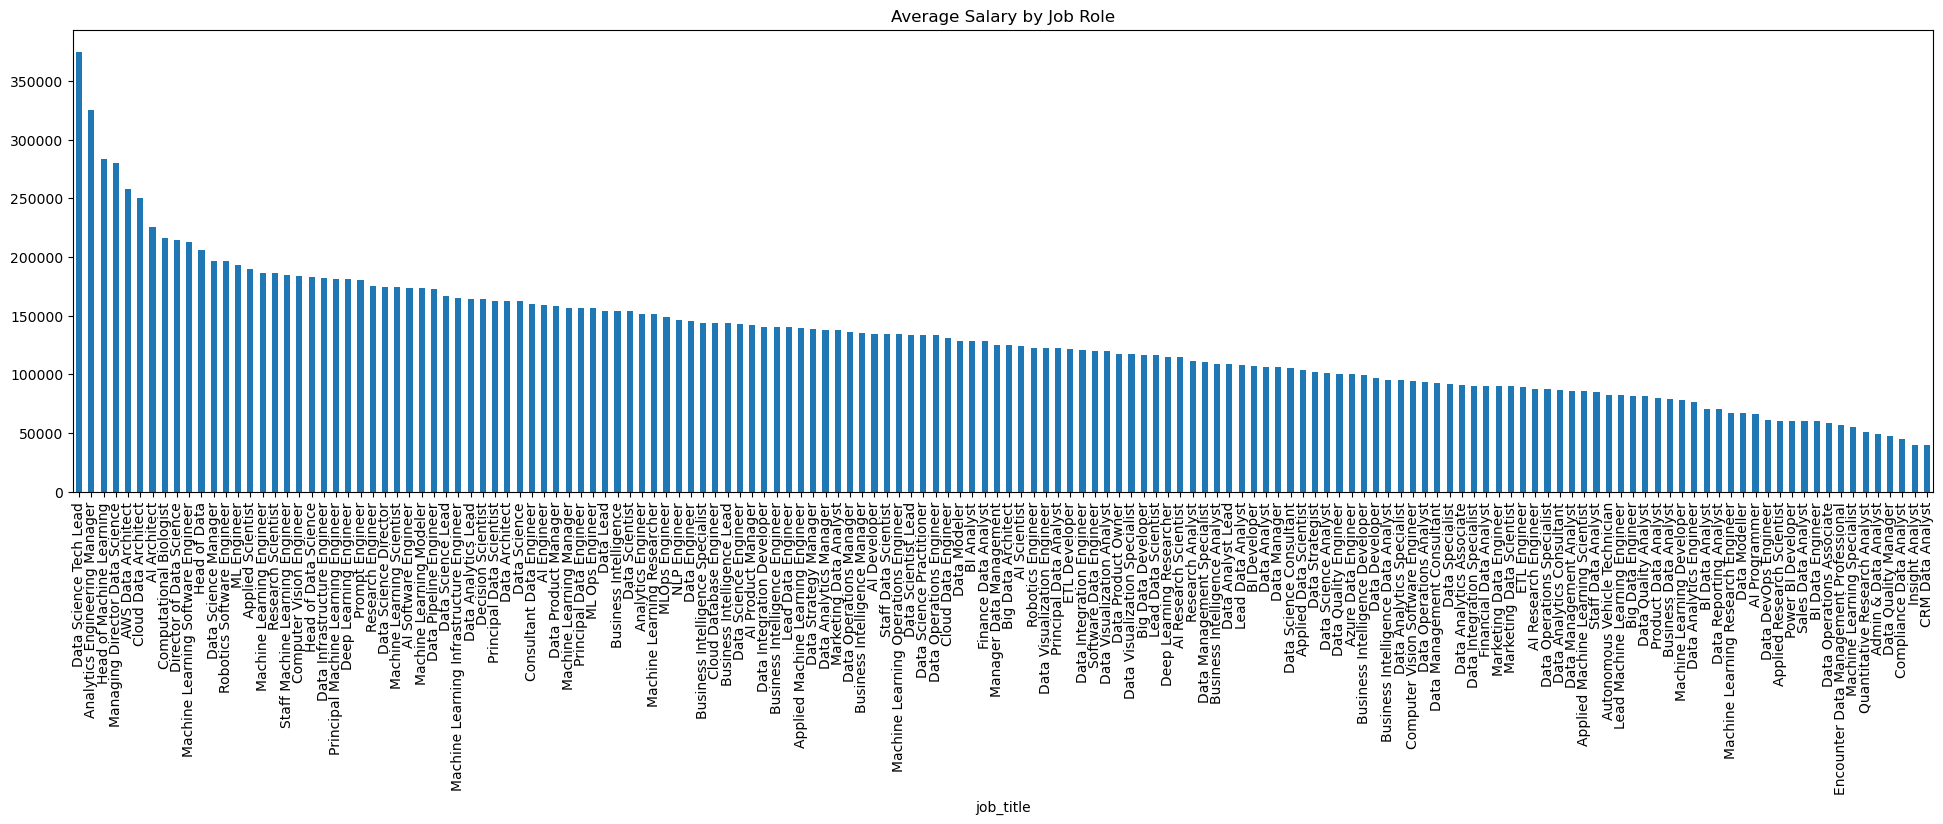

In [28]:
# Average salary by job role
salary_role = data.groupby('job_title')['salary'].mean().sort_values(ascending=False)
print(salary_role)

# Visualization
salary_role.plot(kind='bar', figsize=(24, 6), title='Average Salary by Job Role')
plt.show()

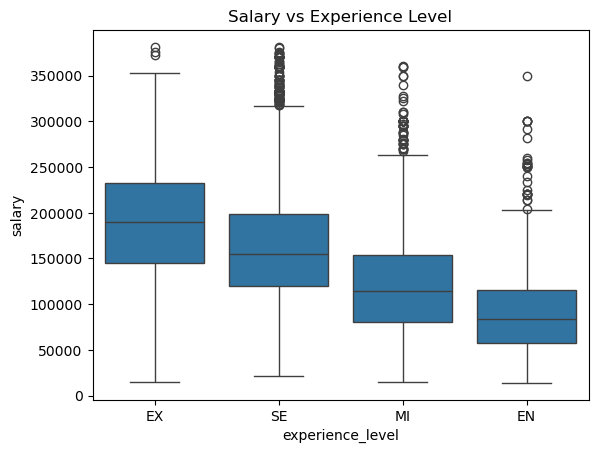

In [34]:
#Salary and Experience
sns.boxplot(data=data, x='experience_level', y='salary')
plt.title('Salary vs Experience Level')
plt.show() 

In [42]:
#Categorizing the Salaries 
# Creating ranges  
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High', 'Top']
data['salary_range'] = pd.cut(data['salary'], bins=bins, labels=labels)

In [46]:
#Creating a Predictive Model, Preparing the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Features and target
X = data_encoded.drop('salary', axis=1)
y = data_encoded['salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))

Mean Absolute Error: 321.54901293396864


In [66]:
# Check for missing values in the entire dataset
print(data.isna().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_range          0
dtype: int64


In [68]:
#QUESTION 1 - How does experience level affect the salary across different regions?
experience_region_salary = data.groupby(['experience_level', 'employee_residence'])['salary_in_usd'].mean().unstack()
experience_region_salary.fillna(0, inplace=True)
print(experience_region_salary)


employee_residence       AD        AE       AM            AR       AS  \
experience_level                                                        
EN                      0.0       0.0      0.0  46666.666667      0.0   
EX                      0.0       0.0      0.0      0.000000      0.0   
MI                  50745.0  115000.0  33500.0      0.000000  45555.0   
SE                      0.0   78750.0      0.0  68125.000000      0.0   

employee_residence         AT             AU        BA             BE  \
experience_level                                                        
EN                  50000.000   76846.700000  120000.0   62020.333333   
EX                      0.000       0.000000       0.0  215936.000000   
MI                  67818.875  137681.148148   30000.0   88654.000000   
SE                  91237.000  165190.769231       0.0   82744.000000   

employee_residence       BG  ...        SI       TH        TN       TR  \
experience_level             ...                

In [70]:
#QUESTION 2
company_size_salary = data.groupby('company_size')['salary_in_usd'].mean()
print(company_size_salary)

company_size
L    143068.163987
M    149580.284169
S     87139.301775
Name: salary_in_usd, dtype: float64


In [72]:
#QUESTION 3
remote_salary = data.groupby('remote_ratio')['salary_in_usd'].mean()
print(remote_salary)

remote_ratio
0      151622.646698
50      87519.339535
100    144622.138107
Name: salary_in_usd, dtype: float64


In [74]:
#QUETSION 4
job_title_salary = data.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().unstack()
job_title_salary.fillna(0, inplace=True)
print(job_title_salary)

experience_level                        EN        EX             MI  \
job_title                                                             
AI Architect                          0.00  215936.0       0.000000   
AI Developer                     110119.50       0.0  112054.000000   
AI Engineer                       33679.00  178800.0  143906.806452   
AI Product Manager                    0.00       0.0  152650.000000   
AI Programmer                     56021.75       0.0   30000.000000   
...                                    ...       ...            ...   
Sales Data Analyst                    0.00       0.0   60000.000000   
Software Data Engineer                0.00       0.0   74883.000000   
Staff Data Analyst                44753.00   15000.0  179998.000000   
Staff Data Scientist                  0.00       0.0       0.000000   
Staff Machine Learning Engineer       0.00       0.0       0.000000   

experience_level                            SE  
job_title                  

/var/folders/bj/3dq6n2f10hq2jp3n279bbntw0000gn/T/ipykernel_17228/3472451961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_title_salary = data.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().unstack()


In [76]:
#QUESTION 5
employment_salary = data.groupby('employment_type')['salary_in_usd'].mean()
print(employment_salary)

employment_type
CT     99847.800000
FL     51879.583333
FT    148756.122598
PT     69608.037037
Name: salary_in_usd, dtype: float64


In [78]:
#QUESTION 6
yearly_salary_growth = data.groupby('work_year')['salary_in_usd'].mean()
print(yearly_salary_growth)

work_year
2020     96455.057971
2021    103273.220513
2022    135256.363525
2023    153308.280590
2024    146771.595690
Name: salary_in_usd, dtype: float64


In [81]:
#QUESTION 7
emp_size_salary = data.groupby(['employment_type', 'company_size'])['salary_in_usd'].mean().unstack()
emp_size_salary.fillna(0, inplace=True)
print(emp_size_salary)

company_size                 L              M             S
employment_type                                            
CT               109984.571429  105427.000000  84004.125000
FL                20000.000000   64259.166667  43400.000000
FT               144260.329335  149713.065575  90142.655629
PT                50747.875000   89104.714286  45193.600000


In [85]:
data.to_csv('cleaned_data.csv', index=False)